<a href="https://colab.research.google.com/github/jain726/Deep-Learning/blob/Deep-Learning/%232_ANN_Pneumonia_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [392]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [393]:
class Model(nn.Module):
  def __init__(self, in_features = 432, h1 = 128, h2 = 64, out_features = 1):
    super().__init__()
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)
    self.dropout = nn.Dropout(0.3)  # Dropout for regularization

  def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.out(x)
        return x

In [394]:
torch.manual_seed(42)
model = Model()

In [395]:
link_train_data = '/content/train_data.csv'
link_test_data = '/content/test_data.csv'
train_data = pd.read_csv(link_train_data)
test_data = pd.read_csv(link_test_data)

In [396]:
# Split features and labels
X_train_og = train_data.drop('target', axis=1).values
y_train_np = train_data['target'].values
X_test_og = test_data.drop('target', axis=1).values
y_test_np = test_data['target'].values

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_og)
X_test_scaled = scaler.transform(X_test_og)

# Convert to tensors
X_train = torch.FloatTensor(X_train_scaled)
X_test = torch.FloatTensor(X_test_scaled)
y_train = torch.FloatTensor(y_train_np).view(-1, 1)
y_test = torch.FloatTensor(y_test_np).view(-1, 1)

In [397]:
# Compute class imbalance and apply pos_weight
counts = torch.bincount(y_train.int().view(-1))
neg, pos = counts[0].item(), counts[1].item()
pos_weight = torch.tensor([neg / pos])
print(f"pos_weight used: {pos_weight.item():.4f}")

# Define loss and optimizer
criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

pos_weight used: 1.0000


In [398]:
# Train model
epochs = 30
losses = []
for i in range(epochs):
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss.item())

    if i % 5 == 0:
        print(f'Epoch: {i}, Loss: {loss.item():.4f}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch: 0, Loss: 0.6910
Epoch: 5, Loss: 0.2945
Epoch: 10, Loss: 0.2250
Epoch: 15, Loss: 0.1983
Epoch: 20, Loss: 0.1864
Epoch: 25, Loss: 0.1692


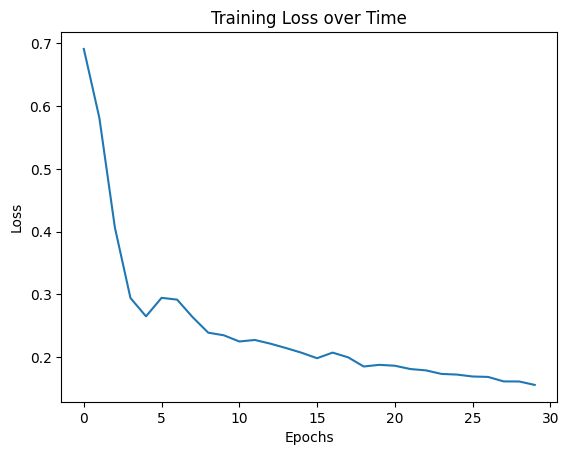

In [399]:
# Plot training loss
plt.plot(range(epochs), losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss over Time")
plt.show()

In [400]:
with torch.no_grad():
    y_eval = model(X_test)
    test_loss = criterion(y_eval, y_test)
    probs = torch.sigmoid(y_eval)
    preds = (probs > 0.5).float()
    correct = (preds == y_test).sum().item()
    accuracy = correct / len(y_test) * 100

print(f"\nTest Loss: {test_loss.item():.4f}")
print(f"Test Accuracy: {accuracy:.2f}%")


Test Loss: 0.9437
Test Accuracy: 73.04%


In [401]:
# Show individual predictions
with torch.no_grad():
    print("\nIndividual Predictions:")
    for i in range(len(X_test)):
        sample = X_test[i].unsqueeze(0)
        logit = model(sample)
        prob = torch.sigmoid(logit).item()
        pred = int(prob > 0.5)
        true = int(y_test[i].item())
        print(f"{i+1}) Predicted: {pred} (Prob: {prob:.4f}) \t True: {true}")


Individual Predictions:
1) Predicted: 0 (Prob: 0.0622) 	 True: 0
2) Predicted: 0 (Prob: 0.4330) 	 True: 0
3) Predicted: 0 (Prob: 0.0237) 	 True: 0
4) Predicted: 0 (Prob: 0.3522) 	 True: 0
5) Predicted: 0 (Prob: 0.0556) 	 True: 0
6) Predicted: 1 (Prob: 0.8562) 	 True: 0
7) Predicted: 0 (Prob: 0.0073) 	 True: 0
8) Predicted: 0 (Prob: 0.0085) 	 True: 0
9) Predicted: 0 (Prob: 0.0594) 	 True: 0
10) Predicted: 0 (Prob: 0.0157) 	 True: 0
11) Predicted: 0 (Prob: 0.0029) 	 True: 0
12) Predicted: 1 (Prob: 0.6830) 	 True: 0
13) Predicted: 0 (Prob: 0.0560) 	 True: 0
14) Predicted: 0 (Prob: 0.0033) 	 True: 0
15) Predicted: 0 (Prob: 0.2334) 	 True: 0
16) Predicted: 0 (Prob: 0.1081) 	 True: 0
17) Predicted: 1 (Prob: 0.8980) 	 True: 0
18) Predicted: 0 (Prob: 0.0895) 	 True: 0
19) Predicted: 0 (Prob: 0.0108) 	 True: 0
20) Predicted: 0 (Prob: 0.0459) 	 True: 0
21) Predicted: 0 (Prob: 0.0574) 	 True: 0
22) Predicted: 0 (Prob: 0.0109) 	 True: 0
23) Predicted: 0 (Prob: 0.0221) 	 True: 0
24) Predicted: 0 (